# Decision Tree Regressor

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset=load_diabetes()

In [4]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
dataset['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
import pandas as pd
X=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
y=dataset['target']

In [12]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3,random_state=42)

In [15]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
379,-0.001882,-0.044642,-0.038540,0.021872,-0.108893,-0.115613,0.022869,-0.076395,-0.046883,0.023775
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
256,-0.049105,-0.044642,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028020,0.011349
396,-0.085430,0.050680,-0.030996,-0.022885,-0.063487,-0.054236,0.019187,-0.039493,-0.096435,-0.034215
100,0.016281,-0.044642,0.017506,-0.022885,0.060349,0.044406,0.030232,-0.002592,0.037236,-0.001078


In [16]:
# Coorelation
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.028085,0.020918,0.289273,0.165784,0.097141,0.038849,0.073959,0.221439,0.199686
sex,0.028085,1.000000,0.098932,0.169170,-0.120587,0.025912,-0.403939,0.311134,0.081558,0.229962
bmi,0.020918,0.098932,1.000000,0.298118,0.152773,0.177475,-0.396427,0.441311,0.481872,0.444925
bp,0.289273,0.169170,0.298118,1.000000,0.191471,0.130717,-0.137326,0.227968,0.371691,0.331514
s1,0.165784,-0.120587,0.152773,0.191471,1.000000,0.899861,0.220246,0.405447,0.437437,0.330640
s2,0.097141,0.025912,0.177475,0.130717,0.899861,1.000000,-0.032873,0.548230,0.262898,0.328622
s3,0.038849,-0.403939,-0.396427,-0.137326,0.220246,-0.032873,1.000000,-0.722606,-0.380374,-0.234550
s4,0.073959,0.311134,0.441311,0.227968,0.405447,0.548230,-0.722606,1.000000,0.609011,0.365187
s5,0.221439,0.081558,0.481872,0.371691,0.437437,0.262898,-0.380374,0.609011,1.000000,0.461161
s6,0.199686,0.229962,0.444925,0.331514,0.330640,0.328622,-0.234550,0.365187,0.461161,1.000000


<Axes: >

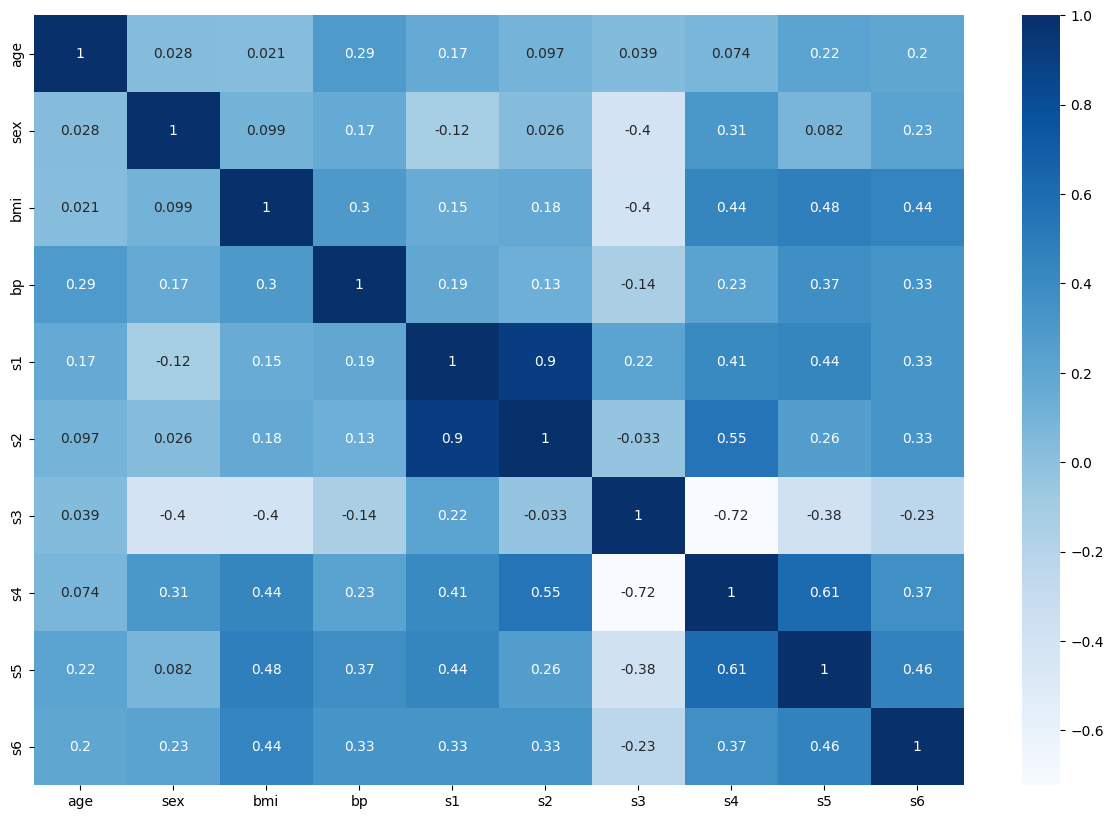

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True,cmap="Blues")

# Hyperparameter Tuning

In [20]:
param={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [23]:
regressor=DecisionTreeRegressor()
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [24]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [25]:
y_pred=grid.predict(X_test)

In [26]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.10321872336607174
54.388938667558605
5095.581724544972


In [27]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [28]:
selectedTree=DecisionTreeRegressor(criterion='poisson',max_depth=3,max_features='sqrt',splitter='best')
selectedTree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=3, max_features='sqrt')

[Text(0.5, 0.875, 'x[2] <= 0.004\npoisson = 21.763\nsamples = 132\nvalue = 143.871'),
 Text(0.25, 0.625, 'x[7] <= 0.031\npoisson = 12.648\nsamples = 79\nvalue = 103.582'),
 Text(0.125, 0.375, 'x[2] <= -0.021\npoisson = 11.141\nsamples = 66\nvalue = 95.288'),
 Text(0.0625, 0.125, 'poisson = 8.756\nsamples = 42\nvalue = 86.595'),
 Text(0.1875, 0.125, 'poisson = 13.445\nsamples = 24\nvalue = 110.5'),
 Text(0.375, 0.375, 'x[4] <= -0.015\npoisson = 10.973\nsamples = 13\nvalue = 145.692'),
 Text(0.3125, 0.125, 'poisson = 16.944\nsamples = 2\nvalue = 209.0'),
 Text(0.4375, 0.125, 'poisson = 7.219\nsamples = 11\nvalue = 134.182'),
 Text(0.75, 0.625, 'x[9] <= 0.042\npoisson = 14.942\nsamples = 53\nvalue = 203.925'),
 Text(0.625, 0.375, 'x[2] <= 0.095\npoisson = 15.681\nsamples = 39\nvalue = 183.564'),
 Text(0.5625, 0.125, 'poisson = 12.459\nsamples = 34\nvalue = 166.853'),
 Text(0.6875, 0.125, 'poisson = 2.691\nsamples = 5\nvalue = 297.2'),
 Text(0.875, 0.375, 'x[8] <= 0.028\npoisson = 2.709\ns

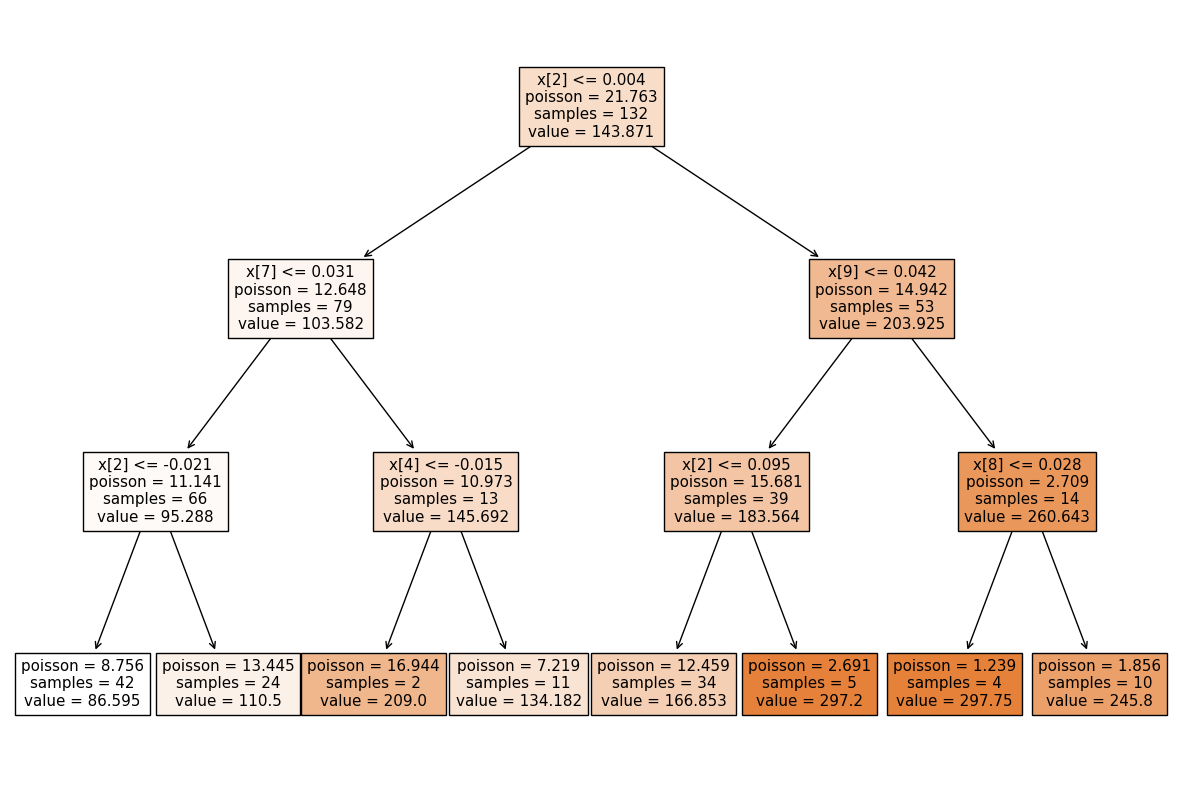

In [29]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedTree,filled=True)